In [ ]:
import pandas as pd

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/nlp practise/train.csv')
data.head()

,question,category
0,"Frances Willard, a president of the WCTU, was ...",history
1,"Used to control glaucoma, a trabeculectomy is ...",science
2,"This January 1, 1863 document liberated all sl...",history
3,"In 1812 Napoleon's Grand Army of 614,000 invad...",history
4,"In 1324 Mali's ruler Mansa Musa made a 4,000-m...",history


## Text preprocessing

Tokenization

Stopwords

Punctuations



In [ ]:
import re

In [ ]:
pat = r'[^\w\s]'

print(re.sub(pat, '', data['question'][0]))

Frances Willard a president of the WCTU was the first woman honored in this Capitol building hall


In [ ]:
cleaned = []
pat = r'[^\w\s]'

for i in data['question']:
  i = re.sub(pat, '', i)
  cleaned.append(' '.join([word.lower() for word in word_tokenize(i) if not word.lower() in stopwords.words('english')]))

data['cleaned'] = cleaned

data.head()

,question,category,cleaned
0,"Frances Willard, a president of the WCTU, was ...",history,frances willard president wctu first woman hon...
1,"Used to control glaucoma, a trabeculectomy is ...",science,used control glaucoma trabeculectomy procedure...
2,"This January 1, 1863 document liberated all sl...",history,january 1 1863 document liberated slaves regio...
3,"In 1812 Napoleon's Grand Army of 614,000 invad...",history,1812 napoleons grand army 614000 invaded count...
4,"In 1324 Mali's ruler Mansa Musa made a 4,000-m...",history,1324 malis ruler mansa musa made 4000mile pilg...


In [ ]:
cleanedtext = []
for i in data['cleaned']:
  for j in i.split(' '):
    cleanedtext.append(j)
cleanedtext[:20]

['frances',
 'willard',
 'president',
 'wctu',
 'first',
 'woman',
 'honored',
 'capitol',
 'building',
 'hall',
 'used',
 'control',
 'glaucoma',
 'trabeculectomy',
 'procedure',
 'reduces',
 'pressure',
 'organ',
 'january',
 '1']

In [ ]:
from nltk import FreqDist

In [ ]:
fd = FreqDist(cleanedtext)
fd

FreqDist({'first': 128, 'country': 118, 'became': 99, 'war': 97, 'us': 94, 'one': 85, 'king': 76, 'city': 71, 'new': 66, 'president': 62, ...})

In [ ]:
FD = pd.DataFrame(fd.most_common(), columns=['words', 'freq'])

In [ ]:
import seaborn as sns

<Axes: xlabel='words', ylabel='freq'>

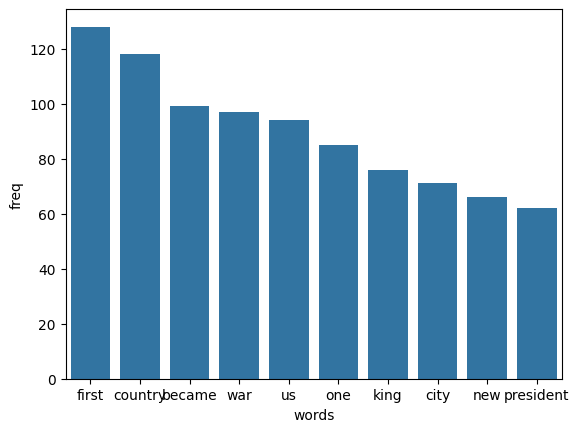

In [ ]:
sns.barplot(x=FD['words'][:10], y=FD['freq'][:10])

In [ ]:
word_length = 0
for i in FD['words']:
  word_length += len(i)

print('Average word length:', (word_length/len(FD['words'])))

Average word length: 7.041732283464567


lets see the most common words by the categories

<Axes: xlabel='count', ylabel='category'>

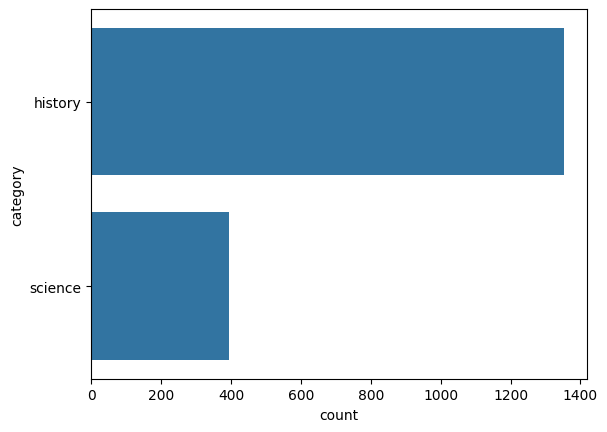

In [ ]:
sns.countplot(data['category'])

In [ ]:
data['category'].value_counts()

category
history    1352
science     395
Name: count, dtype: int64

In [ ]:
hist = data[data['category']=='history']
sci = data[data['category']=='science']

In [ ]:
histcleaned = []
for i in hist['cleaned']:
  for j in i.split(' '):
    histcleaned.append(j)

scicleaned = []
for i in sci['cleaned']:
  for j in i.split(' '):
    scicleaned.append(j)

print(histcleaned[:10], scicleaned[:10])

['frances', 'willard', 'president', 'wctu', 'first', 'woman', 'honored', 'capitol', 'building', 'hall'] ['used', 'control', 'glaucoma', 'trabeculectomy', 'procedure', 'reduces', 'pressure', 'organ', 'month', 'object']


In [ ]:
fd_hist = FreqDist(histcleaned)
fd_sci = FreqDist(scicleaned)

FD_hist = pd.DataFrame(fd_hist.most_common(), columns=['words', 'freq'])
FD_sci = pd.DataFrame(fd_sci.most_common(), columns=['words', 'freq'])

In [ ]:
import matplotlib.pyplot as plt

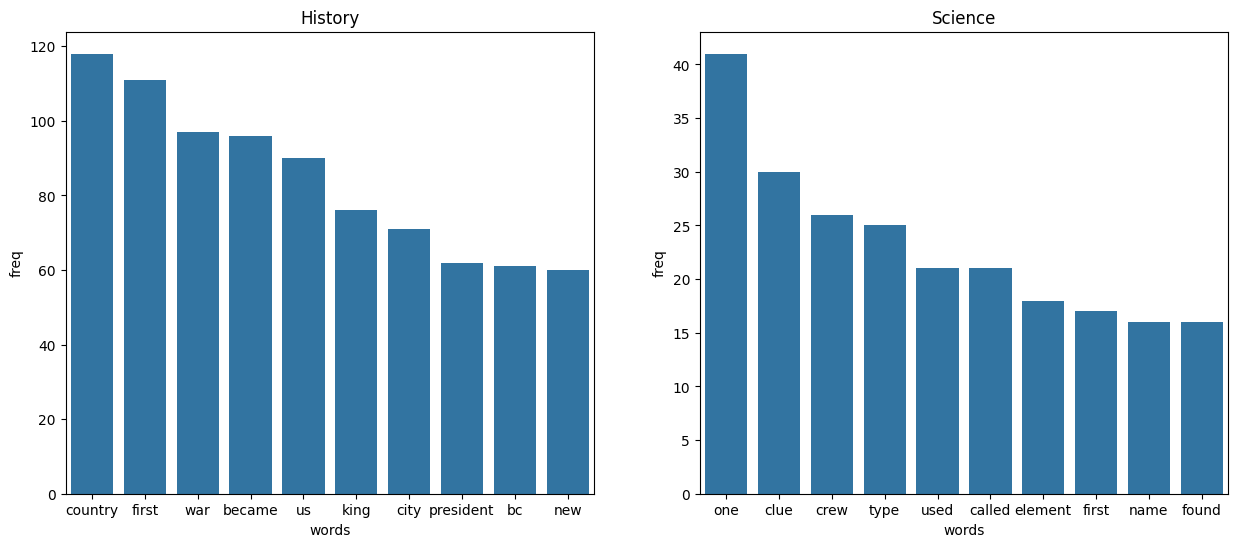

In [ ]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
sns.barplot(x=FD_hist['words'][:10], y=FD_hist['freq'])
ax1.set_title('History')

ax2 = fig.add_subplot(122)
sns.barplot(x=FD_sci['words'][:10], y=FD_sci['freq'])
ax2.set_title('Science')

plt.show()

Now that we have cleaned and analysed the data a bit, we can say that,

The data is imbalanced, so model/metrics should be chose accordingly.

There is a clear distinction between common words of two categories.



In [ ]:
y = data['category']
x = data['cleaned']

In [ ]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf = TfidfVectorizer()

X = tf.fit_transform(x).toarray()
X[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
x_df = pd.DataFrame(X)
x_df.head()

,0,1,2,3,4,5,6,7,8,9,...,6317,6318,6319,6320,6321,6322,6323,6324,6325,6326
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
y[:5]

0    history
1    science
2    history
3    history
4    history
Name: category, dtype: object

In [ ]:
y = y.replace({'history':1, 'science':0})

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [ ]:
preds = nb.predict(x_test)

In [ ]:
print(accuracy_score(y_test, preds))

0.9771428571428571


In [ ]:
print(f1_score(y_test, preds, pos_label='science'))

0.9354838709677419


In [ ]:
confusion_matrix(y_test, preds)

array([[142,   0],
       [  4,  29]])